# 1.0 Import Library and File

In [1]:
import pandas as pd

In [2]:
stud_data = pd.read_csv('BinarySelectedFeatures.csv')
stud_data.head()

,at_risk_binary_encoded,studied_credits,num_of_prev_attempts,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score,imd_band,highest_education
0,0,60,0,2,2,27.0,744.0,717.0,68.7,20-30%,A Level or Equivalent
1,0,60,0,8,1,302.0,4104.0,3802.0,71.6,80-90%,Lower Than A Level
2,0,60,0,3,2,127.0,1944.0,1817.0,76.0,30-40%,A Level or Equivalent
3,0,60,0,6,3,31.0,1150.0,1119.0,77.1,60-70%,HE Qualification
4,0,60,0,3,1,88.0,1896.0,1808.0,69.9,30-40%,Lower Than A Level


# 2.0 Data Preparation

Create a copy of stud_data excluding object data types

In [3]:
stud_numeric_data = stud_data.select_dtypes(exclude=['object']).copy()

In [4]:
stud_numeric_data

,at_risk_binary_encoded,studied_credits,num_of_prev_attempts,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score
0,0,60,0,2,2,27.0,744.0,717.0,68.7
1,0,60,0,8,1,302.0,4104.0,3802.0,71.6
2,0,60,0,3,2,127.0,1944.0,1817.0,76.0
3,0,60,0,6,3,31.0,1150.0,1119.0,77.1
4,0,60,0,3,1,88.0,1896.0,1808.0,69.9
...,...,...,...,...,...,...,...,...,...
32588,0,30,0,3,3,0.0,598.0,598.0,0.0
32589,0,30,0,4,1,0.0,389.0,389.0,0.0
32590,1,30,0,6,2,0.0,283.0,283.0,0.0
32591,1,30,0,0,1,21.0,112.0,91.0,0.0


# 3.0 Model Building

In [5]:
# Feature selection
X = stud_numeric_data.drop(columns=['at_risk_binary_encoded'])
y = stud_numeric_data['at_risk_binary_encoded']

## 3.1 Split the Data

In [6]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.2 Train Model and Make Prediction

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer

# Build the ANN model
ann_model_binary = Sequential()
ann_model_binary.add(InputLayer(input_shape=(X_train_scaled.shape[1],)))
ann_model_binary.add(Dense(128, activation='relu'))
ann_model_binary.add(Dropout(0.3))
ann_model_binary.add(Dense(64, activation='relu'))
ann_model_binary.add(Dropout(0.3))
ann_model_binary.add(Dense(32, activation='relu'))
ann_model_binary.add(Dropout(0.3))
ann_model_binary.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = ann_model_binary.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), batch_size=32)

d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8264 - loss: 0.3946 - val_accuracy: 0.9009 - val_loss: 0.2528
Epoch 2/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8927 - loss: 0.2743 - val_accuracy: 0.9084 - val_loss: 0.2405
Epoch 3/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9058 - loss: 0.2447 - val_accuracy: 0.9121 - val_loss: 0.2296
Epoch 4/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9087 - loss: 0.2417 - val_accuracy: 0.9124 - val_loss: 0.2248
Epoch 5/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9102 - loss: 0.2352 - val_accuracy: 0.9138 - val_loss: 0.2233
Epoch 6/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9084 - loss: 0.2371 - val_accuracy: 0.9096 - val_loss: 0.2291
Epoch 7/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9099 - loss: 0.2362 - val_accuracy: 0.9139 - val_loss: 0.2217
Epoch 8/100
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9106 - loss: 0.2297 - val_accu

## 3.3 Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred_prob = ann_model_binary.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9138
Confusion Matrix:
[[2925  154]
 [ 408 3032]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3079
           1       0.95      0.88      0.92      3440

    accuracy                           0.91      6519
   macro avg       0.91      0.92      0.91      6519
weighted avg       0.92      0.91      0.91      6519



plot ROC Curve

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_binary_roc_curve(model, X_test, y_test):
    # Compute probabilities for the positive class
    y_score = model.predict(X_test).ravel()
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (AUC = {0:0.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create a DataFrame to display ROC AUC value
    roc_auc_df = pd.DataFrame({'ROC AUC': [roc_auc]})

    # Display the DataFrame
    print("ROC AUC value:")
    print(roc_auc_df)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


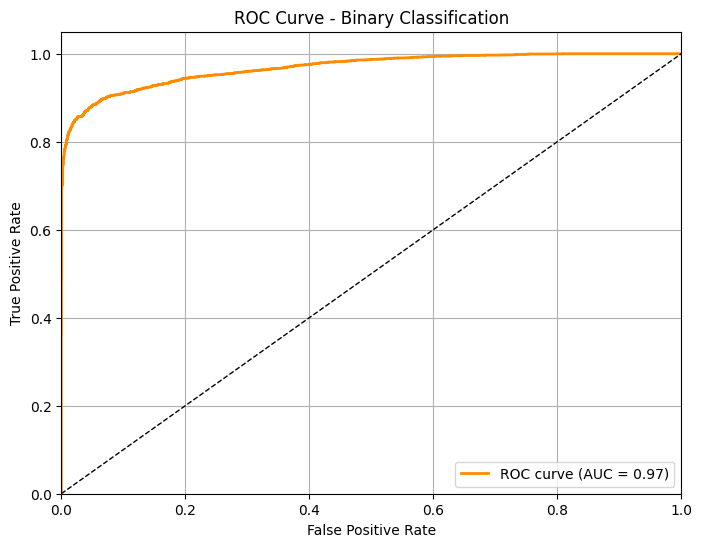

ROC AUC value:
    ROC AUC
0  0.967855


In [11]:
plot_binary_roc_curve(ann_model_binary, X_test_scaled, y_test)

In [12]:
# Evaluate the model
train_loss, train_accuracy = ann_model_binary.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = ann_model_binary.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Training Loss: {train_loss:.4f}')
print(f'Validation Loss: {test_loss:.4f}')

# Checking for overfitting or underfitting based on accuracy
if train_accuracy > test_accuracy:
    if (train_accuracy - test_accuracy) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy < test_accuracy:
    if (test_accuracy - train_accuracy) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")
else:
    print("\nThe model seems to be fitting well.")

Train Accuracy: 0.9197
Test Accuracy: 0.9138
Training Loss: 0.1986
Validation Loss: 0.2188

The model seems to be fitting well.


In [13]:
# Function to check underfitting or overfitting
def plot_learning_curve(history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Plot training & validation accuracy values
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')
    ax[0].grid(True)

    # Plot training & validation loss values
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    ax[1].grid(True)

    plt.show()

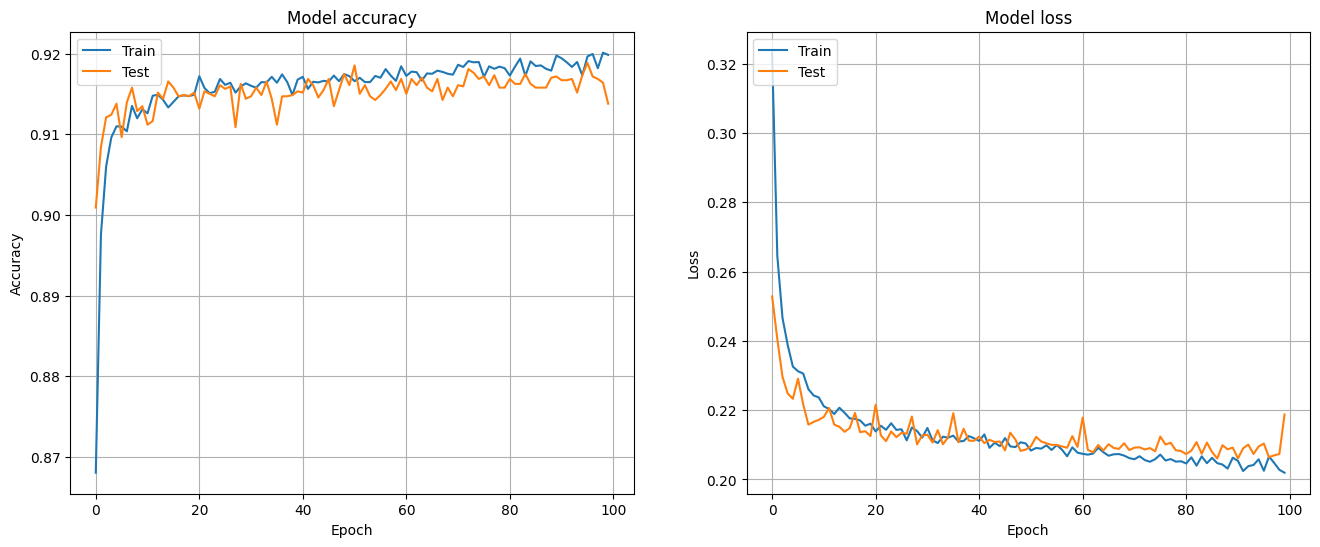

In [14]:
# Plot learning curve
plot_learning_curve(history)

# 4.0 Hyperparameter Tuning

## 4.1 Create Model

In [16]:
from scikeras.wrappers import KerasClassifier

# Build the ANN model function for binary classification
def create_model(optimizer='adam', dropout_rate=0.2, neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
ann_model = KerasClassifier(model=create_model, verbose=0)

## 4.2 Parameter

In [17]:
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.0, 0.1, 0.2],
    'model__neurons': [20, 40, 60]
}

## 4.3 Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


GridSearchCV(cv=5,
             estimator=KerasClassifier(model=<function create_model at 0x000002B7D7DCB560>, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40], 'epochs': [50, 100],
                         'model__dropout_rate': [0.0, 0.1, 0.2],
                         'model__neurons': [20, 40, 60],
                         'optimizer': ['adam', 'rmsprop']},
             verbose=3)

In [19]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best parameters found: {'batch_size': 40, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__neurons': 40, 'optimizer': 'adam'}
Best cross-validation accuracy: 0.9195


## 4.4 Train Model with Best Parameters

In [20]:
best_ann_model_binary = grid_search.best_estimator_

best_model_history_binary = best_ann_model_binary.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0).history_

# Make predictions
y_pred_prob_best = best_ann_model_binary.predict(X_test_scaled)
y_pred_best = (y_pred_prob_best > 0.5).astype(int)

d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.4 Model Evaluation

In [21]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best ANN Model Accuracy: {accuracy_best:.4f}')
print('Best ANN Model Confusion Matrix:')
print(conf_matrix_best)
print('Best ANN Model Classification Report:')
print(class_report_best)

Best ANN Model Accuracy: 0.9152
Best ANN Model Confusion Matrix:
[[2963  116]
 [ 437 3003]]
Best ANN Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3079
           1       0.96      0.87      0.92      3440

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519



Plot ROC Curve

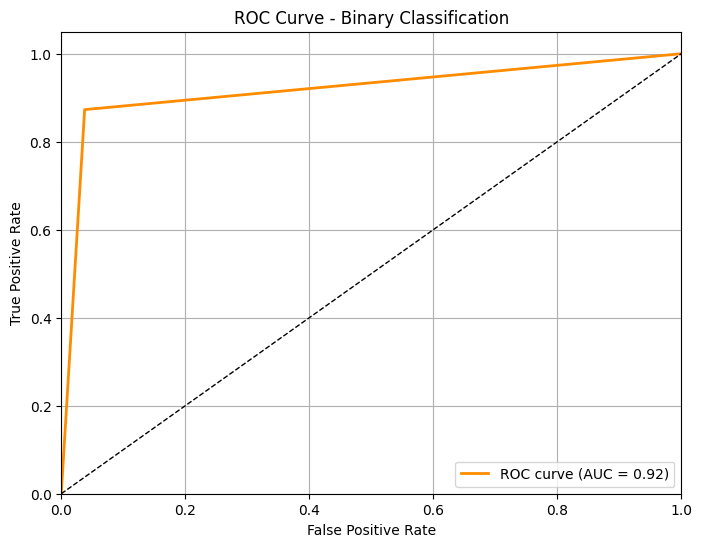

ROC AUC value:
    ROC AUC
0  0.917645


In [22]:
plot_binary_roc_curve(best_ann_model_binary, X_test_scaled, y_test)

Check for Overfitting or Underfitting

In [23]:
def plot_learning_curve_best(history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Plot training & validation accuracy values
    ax[0].plot(history['accuracy'])
    ax[0].plot(history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')
    ax[0].grid(True)

    # Plot training & validation loss values
    ax[1].plot(history['loss'])
    ax[1].plot(history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    ax[1].grid(True)

    plt.show()

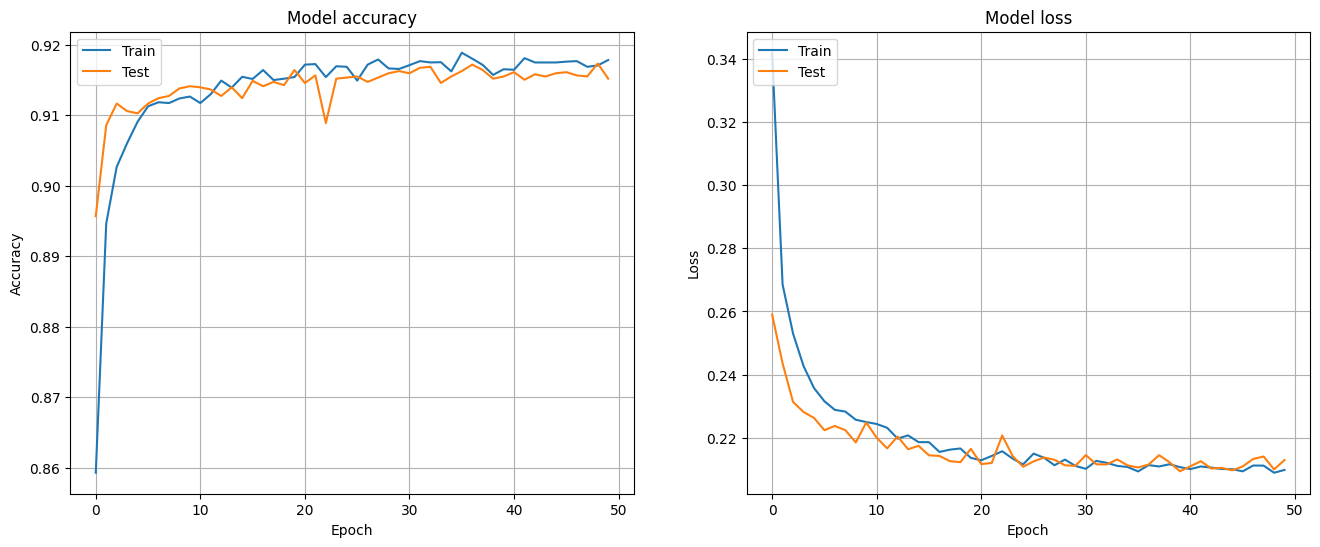

In [24]:
# Plot learning curve for the best model
plot_learning_curve_best(best_model_history_binary)

In [25]:
# Evaluate the model
train_loss_best, train_accuracy_best = best_ann_model_binary.model_.evaluate(X_train_scaled, y_train, verbose=0)
test_loss_best, test_accuracy_best = best_ann_model_binary.model_.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Train Accuracy: {train_accuracy_best:.4f}')
print(f'Test Accuracy: {test_accuracy_best:.4f}')
print(f'Training Loss: {train_loss_best:.4f}')
print(f'Validation Loss: {test_loss_best:.4f}')

# Checking for overfitting or underfitting based on accuracy
if train_accuracy_best > test_accuracy_best:
    if (train_accuracy_best - test_accuracy_best) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy_best < test_accuracy_best:
    if (test_accuracy_best - train_accuracy_best) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")
else:
    print("\nThe model seems to be fitting well.")

Train Accuracy: 0.9213
Test Accuracy: 0.9152
Training Loss: 0.2023
Validation Loss: 0.2130

The model seems to be fitting well.


# 5.0 Feature Importance

In [27]:
# Function to build the ANN model
def build_ann_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
ann_model_binary = KerasClassifier(build_fn=build_ann_model, epochs=100, batch_size=32, verbose=0)

# Train the model
ann_model_binary.fit(X_train_scaled, y_train)

d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


KerasClassifier(
	model=None
	build_fn=<function build_ann_model at 0x000002B792D51080>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

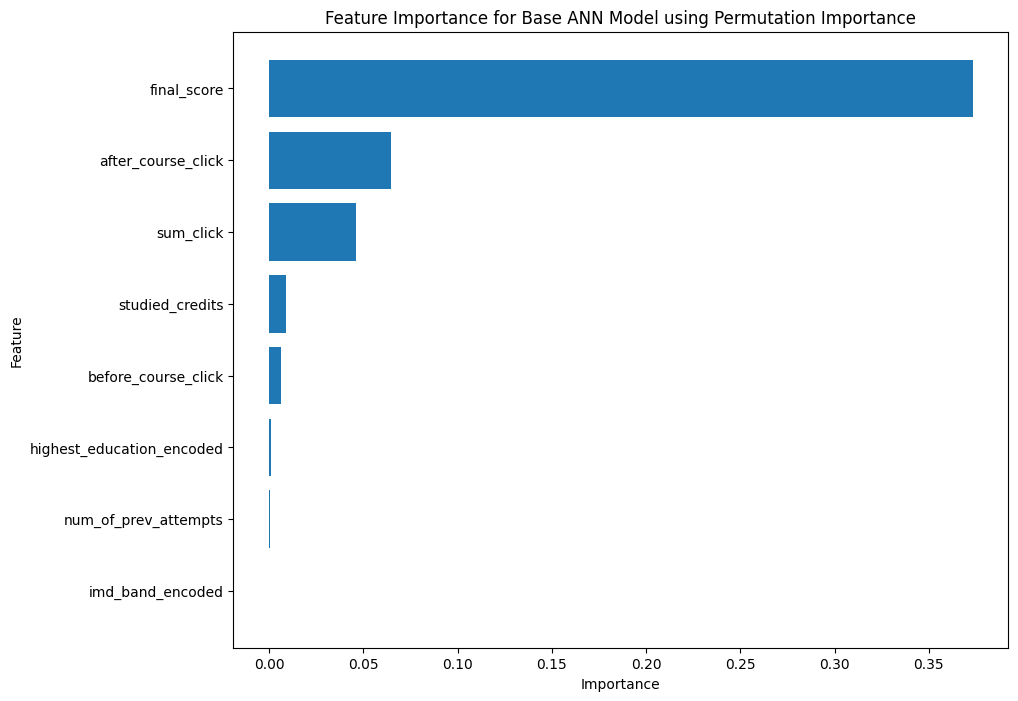

Feature Importances for Base ANN Model:


,Feature,Importance
7,final_score,0.373478
6,after_course_click,0.064892
5,sum_click,0.046249
0,studied_credits,0.008687
4,before_course_click,0.006141
3,highest_education_encoded,0.000701
1,num_of_prev_attempts,0.000522
2,imd_band_encoded,-0.000363


In [28]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
perm_importance = permutation_importance(ann_model_binary, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Extract and sort feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Base ANN Model using Permutation Importance')
plt.gca().invert_yaxis()
plt.show()
# Display feature importance table
print("Feature Importances for Base ANN Model:")
feature_importance_df

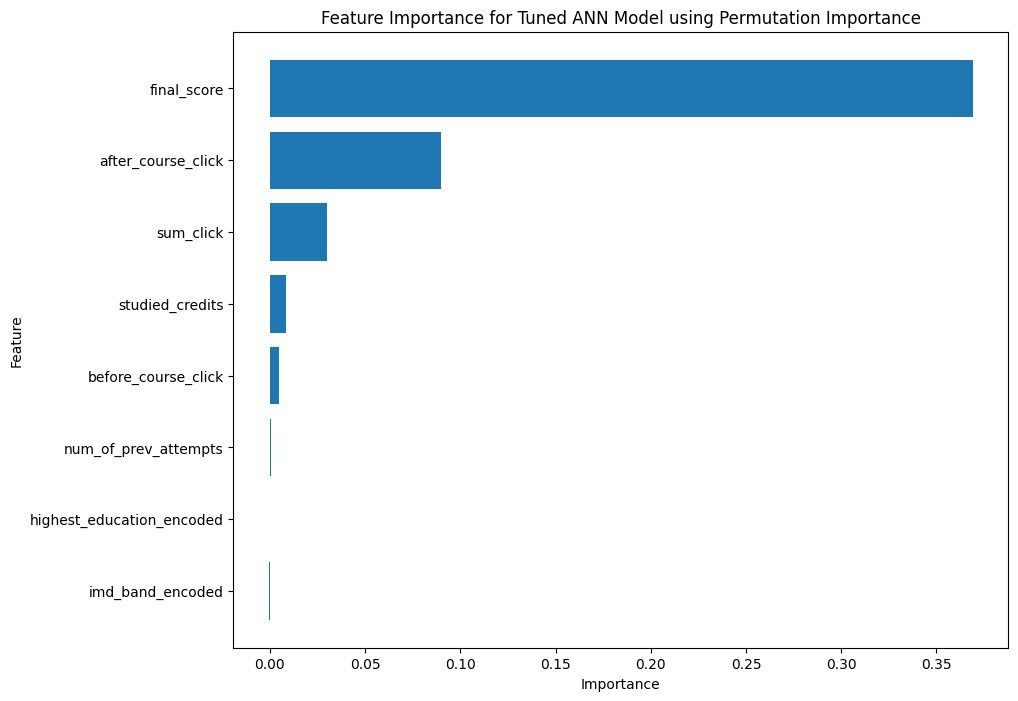

Feature Importances for Tuned ANN Model:


,Feature,Importance
7,final_score,0.369203
6,after_course_click,0.089968
5,sum_click,0.029902
0,studied_credits,0.008253
4,before_course_click,0.004571
1,num_of_prev_attempts,0.000409
3,highest_education_encoded,0.000010
2,imd_band_encoded,-0.000716


In [29]:
from sklearn.inspection import permutation_importance 

# Compute permutation feature importance
perm_importance = permutation_importance(best_ann_model_binary, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Extract and sort feature importances
feature_importance_tuned_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_tuned_df['Feature'], feature_importance_tuned_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Tuned ANN Model using Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

# Display feature importance table
print("Feature Importances for Tuned ANN Model:")
feature_importance_tuned_df

# Save Model

In [33]:
# Save the best model
ann_model_binary.model_.save('Model/Base/ann_model_binary.keras')

In [34]:
# Save the best model
best_ann_model_binary.model_.save('Model/Tuned/best_ann_model_binary.keras')